In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from scipy import stats

In [40]:
#merging all 15 datasets into one dataset
mergestorm_df = pd.concat( 
    map(pd.read_csv, ["resources/stormevents_2022.csv", 
                      "resources/stormevents_2021.csv",
                      "resources/stormevents_2020.csv",
                      "resources/stormevents_2019.csv",
                      "resources/stormevents_2018.csv", 
                      "resources/stormevents_2017.csv", 
                      "resources/stormevents_2016.csv", 
                      "resources/stormevents_2015.csv", 
                      "resources/stormevents_2014.csv", 
                      "resources/stormevents_2013.csv", 
                      "resources/stormevents_2012.csv", 
                      "resources/stormevents_2011.csv", 
                      "resources/stormevents_2010.csv", 
                      "resources/stormevents_2009.csv", 
                      "resources/stormevents_2008.csv"]),
    ignore_index=True) 
mergestorm_df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,202202,20,2118,202202,20,2218,165464,999902,NEVADA,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strong winds increased ahead of an approaching...,"Station (UP994) 3.1 SE West Wendover, Elevatio...",CSV
1,202202,21,800,202202,22,1000,165465,999903,NEVADA,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low centered over northern and central Nevad...,Thirteen inches fell at station (BCSN2) Big Cr...,CSV
2,202202,22,200,202202,22,900,165465,999904,NEVADA,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low centered over northern and central Nevad...,Fifteen inches fell at station (TJMN2) Toe Jam...,CSV
3,202202,18,1609,202202,18,1609,165611,1001181,ATLANTIC SOUTH,87,...,7.0,SE,PONTE VEDRA,30.050,-81.1700,30.0500,-81.1700,Pre-frontal showers and thunderstorms moved so...,A brief waterspout was observed offshore of So...,CSV
4,202202,2,0,202202,3,0,165668,1001527,AMERICAN SAMOA,97,...,5.0,NNW,VAITOGI,-14.333,-170.7157,-14.3393,-170.7268,A surface trough over the Islands held the po...,"Over a 24-hour period, WSO Pago Pago recorded ...",CSV


In [41]:
# Create a DataFrame with selected columns 
clean_mergestorm_df = mergestorm_df[["YEAR", "STATE", "EVENT_TYPE",  
                              "INJURIES_DIRECT", "INJURIES_INDIRECT",
                              "DEATHS_DIRECT", "DEATHS_INDIRECT",
                                "DAMAGE_PROPERTY","DAMAGE_CROPS", 
                                "SOURCE", "MAGNITUDE", "MAGNITUDE_TYPE", 
                                "TOR_F_SCALE", "TOR_LENGTH", "TOR_WIDTH", 
                                "TOR_OTHER_CZ_STATE", "BEGIN_LOCATION", 
                                 "BEGIN_LAT", "BEGIN_LON", "END_LAT", 
                                "END_LON", "EPISODE_ID", "EVENT_ID",]]
clean_mergestorm_df.head()

,YEAR,STATE,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,...,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID
0,2022,NEVADA,High Wind,0,0,0,0,0.00K,0.00K,Mesonet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165464,999902
1,2022,NEVADA,Heavy Snow,0,0,0,0,0.00K,0.00K,SNOTEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165465,999903
2,2022,NEVADA,Heavy Snow,0,0,0,0,0.00K,0.00K,SNOTEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165465,999904
3,2022,ATLANTIC SOUTH,Waterspout,0,0,0,0,0.00K,0.00K,Trained Spotter,...,NaN,NaN,NaN,PONTE VEDRA,30.050,-81.1700,30.0500,-81.1700,165611,1001181
4,2022,AMERICAN SAMOA,Heavy Rain,0,0,0,0,50.00K,0.00K,Official NWS Observations,...,NaN,NaN,NaN,VAITOGI,-14.333,-170.7157,-14.3393,-170.7268,165668,1001527


In [42]:
#looking to see what the data types are
clean_mergestorm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948286 entries, 0 to 948285
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   YEAR                948286 non-null  int64  
 1   STATE               948286 non-null  object 
 2   EVENT_TYPE          948286 non-null  object 
 3   INJURIES_DIRECT     948286 non-null  int64  
 4   INJURIES_INDIRECT   948286 non-null  int64  
 5   DEATHS_DIRECT       948286 non-null  int64  
 6   DEATHS_INDIRECT     948286 non-null  int64  
 7   DAMAGE_PROPERTY     777435 non-null  object 
 8   DAMAGE_CROPS        775903 non-null  object 
 9   SOURCE              948286 non-null  object 
 10  MAGNITUDE           500839 non-null  float64
 11  MAGNITUDE_TYPE      340870 non-null  object 
 12  TOR_F_SCALE         21140 non-null   object 
 13  TOR_LENGTH          21140 non-null   float64
 14  TOR_WIDTH           21140 non-null   float64
 15  TOR_OTHER_CZ_STATE  2733 non-null 

In [43]:
# Change a string into a float; account for magnitude of
# the number as represented in the string
def retype_damage_value(value_str):
    if (value_str == float('nan')):
        return value_str
    magnitude = value_str[-1]
    num = float(value_str[0:-2])
    if magnitude == 'K':
        num = num * 1000
    elif magnitude == 'M':
        num = num * 1000000
    elif magnitude == 'B':
        num = num * 1000000000
    else:
        num = float(value_str)
    return num

In [44]:
#Making the NaN values 0 for damage property and crops
clean_mergestorm_df.loc[:,"DAMAGE_PROPERTY"]=clean_mergestorm_df["DAMAGE_PROPERTY"].fillna("0.00K")
clean_mergestorm_df.loc[:,"DAMAGE_CROPS"]=clean_mergestorm_df["DAMAGE_CROPS"].fillna("0.00K")

In [45]:
# changing damage columns from object to float
clean_mergestorm_df['DAMAGE_CROPS'] = clean_mergestorm_df['DAMAGE_CROPS'].apply(retype_damage_value)
clean_mergestorm_df['DAMAGE_PROPERTY'] = clean_mergestorm_df['DAMAGE_PROPERTY'].apply(retype_damage_value)

/var/folders/38/_k6_rjgd5yl097bq5472r70h0000gn/T/ipykernel_84630/2848214805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_mergestorm_df['DAMAGE_CROPS'] = clean_mergestorm_df['DAMAGE_CROPS'].apply(retype_damage_value)
/var/folders/38/_k6_rjgd5yl097bq5472r70h0000gn/T/ipykernel_84630/2848214805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_mergestorm_df['DAMAGE_PROPERTY'] = clean_mergestorm_df['DAMAGE_PROPERTY'].apply(retype_damage_value)


In [46]:
#checking that the conversion from object to float worked - yes!
clean_mergestorm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948286 entries, 0 to 948285
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   YEAR                948286 non-null  int64  
 1   STATE               948286 non-null  object 
 2   EVENT_TYPE          948286 non-null  object 
 3   INJURIES_DIRECT     948286 non-null  int64  
 4   INJURIES_INDIRECT   948286 non-null  int64  
 5   DEATHS_DIRECT       948286 non-null  int64  
 6   DEATHS_INDIRECT     948286 non-null  int64  
 7   DAMAGE_PROPERTY     948286 non-null  float64
 8   DAMAGE_CROPS        948286 non-null  float64
 9   SOURCE              948286 non-null  object 
 10  MAGNITUDE           500839 non-null  float64
 11  MAGNITUDE_TYPE      340870 non-null  object 
 12  TOR_F_SCALE         21140 non-null   object 
 13  TOR_LENGTH          21140 non-null   float64
 14  TOR_WIDTH           21140 non-null   float64
 15  TOR_OTHER_CZ_STATE  2733 non-null 

In [47]:
# Add new columns that combine direct and indirect deaths; direct and indirect injuries; and property damage and crop damage
clean_mergestorm_df["TOTAL DEATHS"] = clean_mergestorm_df["DEATHS_DIRECT"] + clean_mergestorm_df["DEATHS_INDIRECT"]
clean_mergestorm_df["TOTAL INJURIES"] = clean_mergestorm_df["INJURIES_DIRECT"] + clean_mergestorm_df["INJURIES_INDIRECT"]
clean_mergestorm_df["TOTAL DAMAGES"] = clean_mergestorm_df["DAMAGE_PROPERTY"] + clean_mergestorm_df["DAMAGE_CROPS"]

clean_mergestorm_df.head()

/var/folders/38/_k6_rjgd5yl097bq5472r70h0000gn/T/ipykernel_84630/375175108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_mergestorm_df["TOTAL DEATHS"] = clean_mergestorm_df["DEATHS_DIRECT"] + clean_mergestorm_df["DEATHS_INDIRECT"]
/var/folders/38/_k6_rjgd5yl097bq5472r70h0000gn/T/ipykernel_84630/375175108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_mergestorm_df["TOTAL INJURIES"] = clean_mergestorm_df["INJURIES_DIRECT"] + clean_mergestorm_df["INJURIES_INDIRECT"]
/var/folders/38/_k6_

,YEAR,STATE,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,...,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES
0,2022,NEVADA,High Wind,0,0,0,0,0.0,0.0,Mesonet,...,NaN,NaN,NaN,NaN,NaN,165464,999902,0,0,0.0
1,2022,NEVADA,Heavy Snow,0,0,0,0,0.0,0.0,SNOTEL,...,NaN,NaN,NaN,NaN,NaN,165465,999903,0,0,0.0
2,2022,NEVADA,Heavy Snow,0,0,0,0,0.0,0.0,SNOTEL,...,NaN,NaN,NaN,NaN,NaN,165465,999904,0,0,0.0
3,2022,ATLANTIC SOUTH,Waterspout,0,0,0,0,0.0,0.0,Trained Spotter,...,PONTE VEDRA,30.050,-81.1700,30.0500,-81.1700,165611,1001181,0,0,0.0
4,2022,AMERICAN SAMOA,Heavy Rain,0,0,0,0,50000.0,0.0,Official NWS Observations,...,VAITOGI,-14.333,-170.7157,-14.3393,-170.7268,165668,1001527,0,0,50000.0


In [48]:
clean_mergestorm_df[["TOTAL DEATHS", "TOTAL INJURIES"]].value_counts()

TOTAL DEATHS  TOTAL INJURIES
0             0                 934362
1             0                   4554
0             1                   3415
              2                   1206
2             0                    697
                                 ...  
              175                    1
              250                    1
              353                    1
3             11                     1
161           1150                   1
Name: count, Length: 349, dtype: int64

In [49]:
#dropping the columns that were combined
drop_merged_df = clean_mergestorm_df.drop(columns=["INJURIES_DIRECT", "INJURIES_INDIRECT",
                                                   "DEATHS_DIRECT", "DEATHS_INDIRECT","DAMAGE_PROPERTY", "DAMAGE_CROPS"])
drop_merged_df.head()

,YEAR,STATE,EVENT_TYPE,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES
0,2022,NEVADA,High Wind,Mesonet,36.0,MS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165464,999902,0,0,0.0
1,2022,NEVADA,Heavy Snow,SNOTEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165465,999903,0,0,0.0
2,2022,NEVADA,Heavy Snow,SNOTEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165465,999904,0,0,0.0
3,2022,ATLANTIC SOUTH,Waterspout,Trained Spotter,NaN,NaN,NaN,NaN,NaN,NaN,PONTE VEDRA,30.050,-81.1700,30.0500,-81.1700,165611,1001181,0,0,0.0
4,2022,AMERICAN SAMOA,Heavy Rain,Official NWS Observations,NaN,NaN,NaN,NaN,NaN,NaN,VAITOGI,-14.333,-170.7157,-14.3393,-170.7268,165668,1001527,0,0,50000.0


In [50]:
# Narrow down events that have had at least one death and/or at least one injury 
narrow_df = drop_merged_df.loc[(drop_merged_df["TOTAL DEATHS"] > 0)|
(drop_merged_df["TOTAL INJURIES"] > 0)]

# Display sample data
narrow_df.head()

,YEAR,STATE,EVENT_TYPE,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES
12,2022,FLORIDA,Dense Fog,Emergency Manager,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165593,1001094,0,30,0.0
80,2022,MISSOURI,Winter Storm,Public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175269,1078711,0,3,0.0
461,2022,FLORIDA,Rip Current,County Official,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168741,1021872,1,0,0.0
472,2022,FLORIDA,Rip Current,Lifeguard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169739,1027877,0,1,0.0
683,2022,TEXAS,Tornado,NWS Storm Survey,NaN,NaN,EF1,5.19,440.0,NaN,FRUITLAND,33.5182,-97.8369,33.5815,-97.7953,167427,1013708,0,3,0.0


In [51]:
#reordering the placement of the columns
clean_df= narrow_df[["YEAR", "STATE", "EVENT_TYPE",  
                              "TOTAL DEATHS", "TOTAL INJURIES",
                              "TOTAL DAMAGES", 
                              "SOURCE", "MAGNITUDE", "MAGNITUDE_TYPE", 
                              "TOR_F_SCALE", "TOR_LENGTH", "TOR_WIDTH",
                              "TOR_OTHER_CZ_STATE", "BEGIN_LOCATION", 
                              "BEGIN_LAT", "BEGIN_LON", "END_LAT", "END_LON", 
                              "EPISODE_ID", "EVENT_ID",]]
# reset the index 
clean_df.reset_index(drop=True, inplace=True)

clean_df.head()

,YEAR,STATE,EVENT_TYPE,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID
0,2022,FLORIDA,Dense Fog,0,30,0.0,Emergency Manager,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165593,1001094
1,2022,MISSOURI,Winter Storm,0,3,0.0,Public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175269,1078711
2,2022,FLORIDA,Rip Current,1,0,0.0,County Official,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168741,1021872
3,2022,FLORIDA,Rip Current,0,1,0.0,Lifeguard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169739,1027877
4,2022,TEXAS,Tornado,0,3,0.0,NWS Storm Survey,NaN,NaN,EF1,5.19,440.0,NaN,FRUITLAND,33.5182,-97.8369,33.5815,-97.7953,167427,1013708


In [52]:
# Export the narrowed data into a csv
clean_df.to_csv("clean_df.csv")



In [53]:
# Read saved data
pd.read_csv("clean_df.csv")

clean_df.head()

,YEAR,STATE,EVENT_TYPE,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID
0,2022,FLORIDA,Dense Fog,0,30,0.0,Emergency Manager,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165593,1001094
1,2022,MISSOURI,Winter Storm,0,3,0.0,Public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175269,1078711
2,2022,FLORIDA,Rip Current,1,0,0.0,County Official,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168741,1021872
3,2022,FLORIDA,Rip Current,0,1,0.0,Lifeguard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169739,1027877
4,2022,TEXAS,Tornado,0,3,0.0,NWS Storm Survey,NaN,NaN,EF1,5.19,440.0,NaN,FRUITLAND,33.5182,-97.8369,33.5815,-97.7953,167427,1013708


In [54]:
#check total deaths, injuries, damages

print(clean_df[["TOTAL DEATHS"]].sum())


TOTAL DEATHS    12198
dtype: int64


In [76]:
#Grouping the dataset by deaths and year
# groupbydeath_df=clean_df.sort_values(["TOTAL DEATHS","YEAR",], 
                                     # ascending=False).groupby("TOTAL DEATHS").head()
groupbydeath_df=clean_df.sort_values(["TOTAL DEATHS"], 
                                     ascending=False).groupby("TOTAL DEATHS").head()


The correlation between average total deaths and average total cost of damages is 0.44


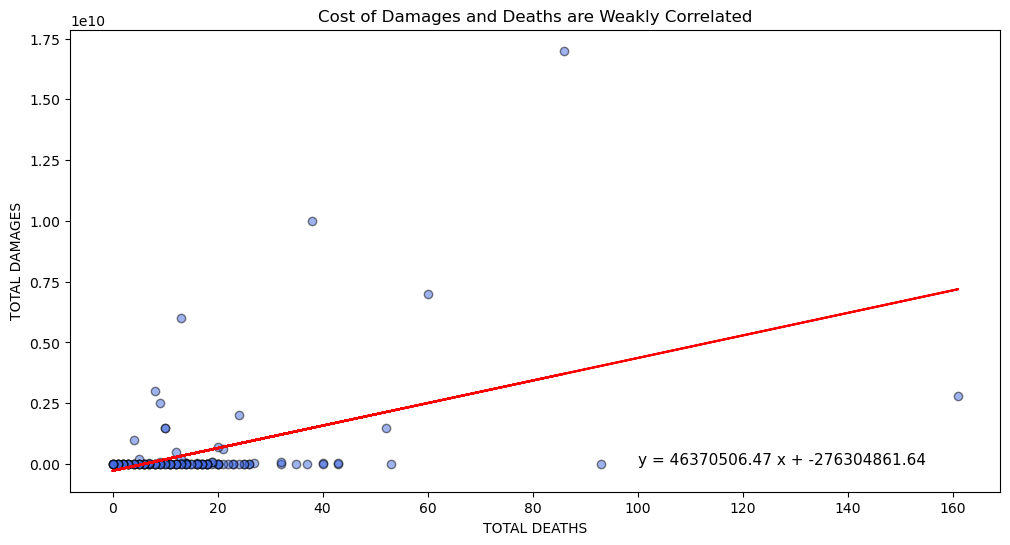

In [77]:
# Calculate the correlation coefficient and a linear regression model for deaths and damages

death_damages = groupbydeath_df.groupby("EPISODE_ID").agg({"TOTAL DEATHS": "mean", "TOTAL DAMAGES": "mean"})

correlation =stats.pearsonr(death_damages["TOTAL DEATHS"],death_damages["TOTAL DAMAGES"])
print(f"The correlation between average total deaths and average total cost of damages is {round(correlation[0],2)}")

# Add the linear regression equation and line to plot
(slope, intercept,rvalue, pvalue, stderr)= stats.linregress(death_damages["TOTAL DEATHS" ],death_damages["TOTAL DAMAGES"])
regress_values= death_damages["TOTAL DEATHS"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.figure(figsize=(12, 6))
plt.scatter(groupbydeath_df["TOTAL DEATHS"], groupbydeath_df["TOTAL DAMAGES"] ,color='royalblue', edgecolor='k', alpha=0.5)
plt.plot(death_damages["TOTAL DEATHS"], regress_values, color='red')
plt.annotate(line_eq,(100, 36), fontsize=11)
plt.xlabel("TOTAL DEATHS") 
plt.ylabel("TOTAL DAMAGES")
plt.title("Cost of Damages and Deaths are Weakly Correlated")
plt.show()

In [78]:
# Add new columns that combine deaths and injuries (to look for correlation with damages)
groupbydeath_df["TOTAL DEATHS & INJURIES"] = groupbydeath_df["TOTAL DEATHS"] + groupbydeath_df["TOTAL INJURIES"]

The correlation between total deaths and inuries combined and the cost of total damages is 0.13


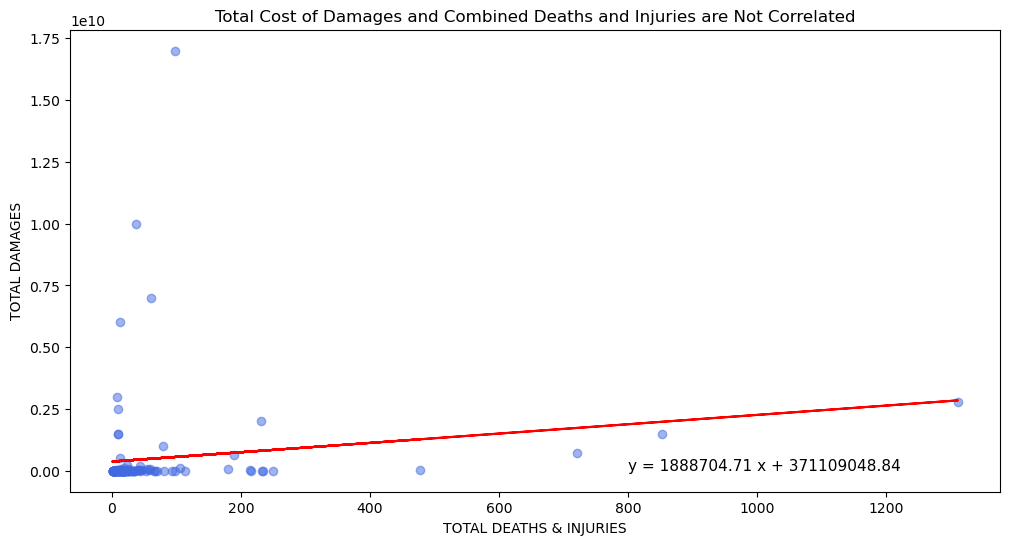

In [79]:
# Calculate the correlation coefficient and a linear regression model for total deaths/injuries and damages

death_damages = groupbydeath_df.groupby("EPISODE_ID").agg({"TOTAL DEATHS & INJURIES": "mean", "TOTAL DAMAGES": "mean"})

correlation =stats.pearsonr(death_damages["TOTAL DEATHS & INJURIES"],death_damages["TOTAL DAMAGES"])
print(f"The correlation between total deaths and inuries combined and the cost of total damages is {round(correlation[0],2)}")

# Add the linear regression equation and line to plot
(slope, intercept,rvalue, pvalue, stderr)= stats.linregress(death_damages["TOTAL DEATHS & INJURIES" ],death_damages["TOTAL DAMAGES"])
regress_values= death_damages["TOTAL DEATHS & INJURIES"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.figure(figsize=(12, 6))
plt.scatter(groupbydeath_df["TOTAL DEATHS & INJURIES"], groupbydeath_df["TOTAL DAMAGES"] ,color='royalblue', alpha=0.5)
plt.plot(death_damages["TOTAL DEATHS & INJURIES"], regress_values, color='red')
plt.annotate(line_eq,(800, 36), fontsize=11)
plt.xlabel("TOTAL DEATHS & INJURIES") 
plt.ylabel("TOTAL DAMAGES")
plt.title("Total Cost of Damages and Combined Deaths and Injuries are Not Correlated")
plt.show()

In [80]:
top_5 = groupbydeath_df.head()

top_5

,YEAR,STATE,EVENT_TYPE,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,TOR_F_SCALE,...,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID,TOTAL DEATHS & INJURIES
9652,2011,MISSOURI,Tornado,161,1150,2.800000e+09,NWS Storm Survey,NaN,NaN,EF5,...,1600.0,MO,CENTRAL CITY,37.056,-94.5701,37.0544,-94.4105,49972,296617,1311
1098,2021,OREGON,Excessive Heat,93,0,1.000000e+05,ASOS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158241,961302,93
3640,2018,CALIFORNIA,Wildfire,86,12,1.700000e+10,Fire Department/Rescue,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131864,788675,98
454,2022,FLORIDA,Hurricane,60,0,7.000000e+09,Official NWS Observations,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174632,1058654,60
31,2022,TEXAS,Heat,53,0,0.000000e+00,Broadcast Media,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171258,1039790,53


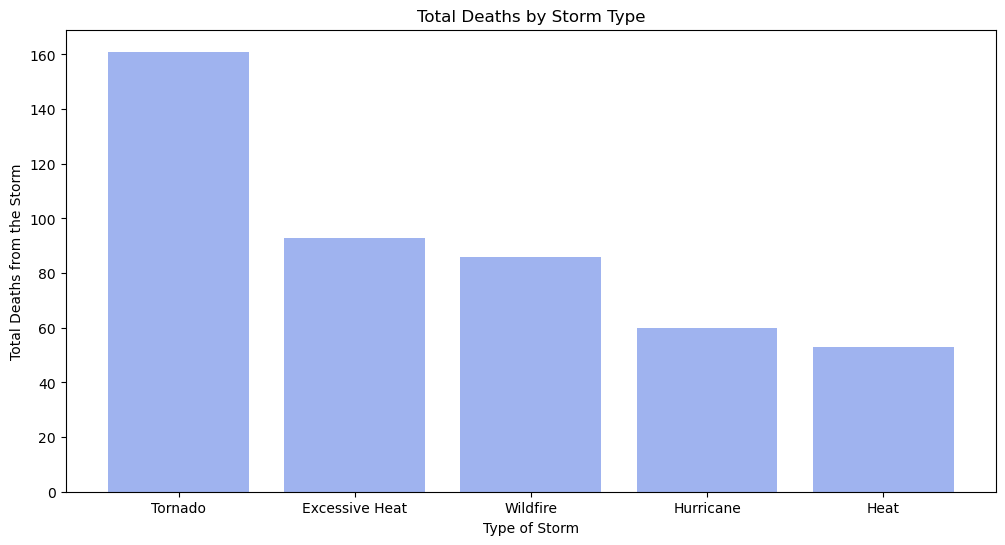

In [81]:
# bar graph for top 5 deadliest and type
plt.figure(figsize=(12, 6))
plt.bar(top_5['EVENT_TYPE'], top_5['TOTAL DEATHS'], color='royalblue', alpha=0.5)
plt.title('Total Deaths by Storm Type')
plt.xlabel('Type of Storm')
plt.ylabel('Total Deaths from the Storm')
plt.show()

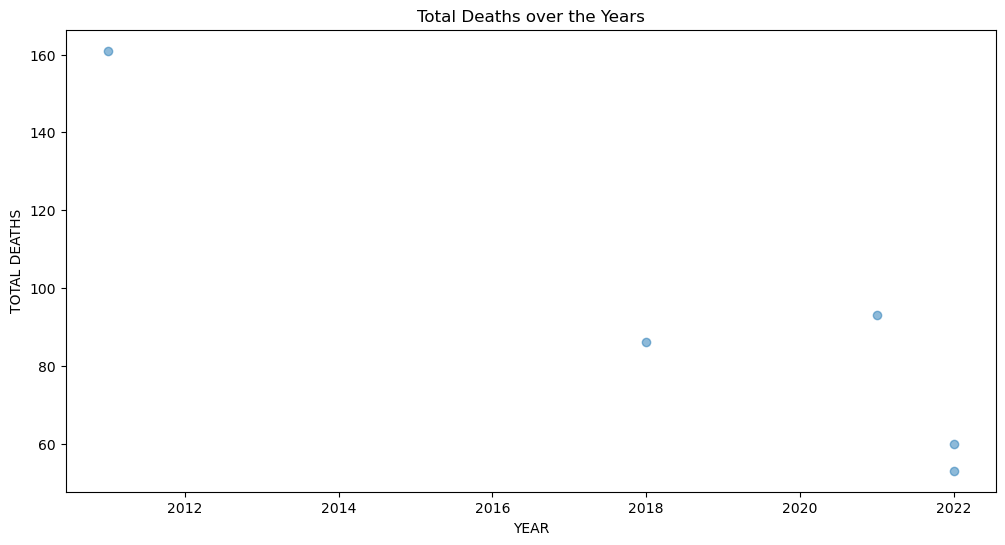

The correlation between total deaths and the average total damages is 0.44


In [84]:
# Create a bar plot for top 5 deadliest storms over the last 15 years 
plt.figure(figsize=(12, 6))
plt.scatter(top_5['YEAR'], top_5['TOTAL DEATHS'], alpha=0.5)
plt.title('Total Deaths over the Years')
plt.xlabel('YEAR')
plt.ylabel('TOTAL DEATHS')
plt.show()

death_damages = groupbydeath_df.groupby("EPISODE_ID").agg({"TOTAL DEATHS": "mean", "TOTAL DAMAGES": "mean"})

correlation =stats.pearsonr(death_damages["TOTAL DEATHS"],death_damages["TOTAL DAMAGES"])
print(f"The correlation between total deaths and the average total damages is {round(correlation[0],2)}")

The correlation between mean total deaths and the mean cost of total damages is -0.08


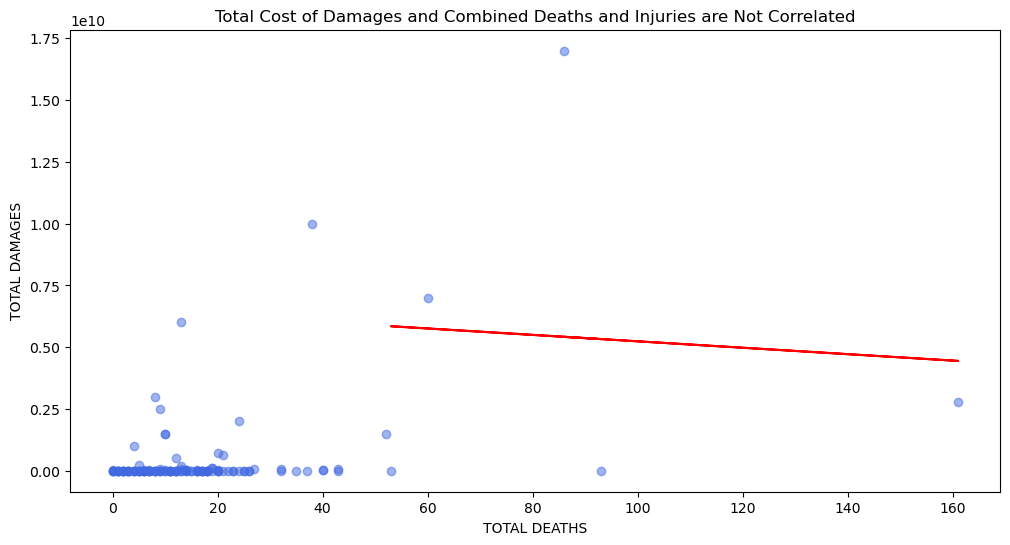

In [82]:
# Calculate the correlation coefficient and a linear regression model for total deaths and event type

death_type = top_5.groupby("EVENT_TYPE").agg({"TOTAL DEATHS": "mean", "TOTAL DAMAGES": "mean"})

correlation =stats.pearsonr(death_type["TOTAL DEATHS"],death_type["TOTAL DAMAGES"])
print(f"The correlation between mean total deaths and the mean cost of total damages is {round(correlation[0],2)}")

# Add the linear regression equation and line to plot
(slope, intercept,rvalue, pvalue, stderr)= stats.linregress(death_type["TOTAL DEATHS" ],death_type["TOTAL DAMAGES"])
regress_values= death_type["TOTAL DEATHS"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.figure(figsize=(12, 6))
plt.scatter(groupbydeath_df["TOTAL DEATHS"], groupbydeath_df["TOTAL DAMAGES"] ,color='royalblue', alpha=0.5)
plt.plot(death_type["TOTAL DEATHS"], regress_values, color='red')
plt.annotate(line_eq,(800, 36), fontsize=11)
plt.xlabel("TOTAL DEATHS") 
plt.ylabel("TOTAL DAMAGES")
plt.title("Total Cost of Damages and Combined Deaths and Injuries are Not Correlated")
plt.show()

In [23]:
#find the duplicates for event id to see if we can locate the lat and lon info for the top 5 deadliest storms
duplicate_episodes = groupbydeath_df[groupbydeath_df.duplicated(subset=["EPISODE_ID"])]["EPISODE_ID"].unique()
print(duplicate_episodes)


[ 50516  50455 158241 164438 143440 172563 174632 164333  70044 164334
 175040 136910]


In [24]:
#Get all the data for the duplicate episode ID. 
groupbydeath_df.loc[groupbydeath_df["EPISODE_ID"] == 174632]

,YEAR,STATE,EVENT_TYPE,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,TOR_F_SCALE,...,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID,TOTAL DEATHS & INJURIES
454,2022,FLORIDA,Hurricane,60,0,7.000000e+09,Official NWS Observations,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174632,1058654,60
466,2022,FLORIDA,Hurricane,8,0,3.000000e+09,Official NWS Observations,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174632,1058655,8


In [85]:
#Making the NaN values 0 for total deaths and injuries
groupbydeath_df.loc[:,"TOTAL DEATHS"]=groupbydeath_df["TOTAL DEATHS"].fillna("0")
groupbydeath_df.loc[:,"TOTAL INJURIES"]=groupbydeath_df["TOTAL INJURIES"].fillna("0")

In [86]:
# Playing with summary statistics
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the year and death, injuries, and damages
# Use groupby and summary statistical methods to calculate the following properties of each year and episode 

death_mean = groupbydeath_df.groupby(["YEAR"])["TOTAL DEATHS"].agg(['mean','median','var', 'std', 'sem'])
death_mean = death_mean.sort_values(by="mean", ascending=False)
print (death_mean.head())

injury_mean = groupbydeath_df.groupby(["YEAR"])["TOTAL INJURIES"].agg(['mean','median','var', 'std', 'sem'])
injury_mean = injury_mean.sort_values(by="mean", ascending=False)
print(injury_mean.head())

damages_mean = groupbydeath_df.groupby(["YEAR"])["TOTAL DAMAGES"].agg(['mean','median','var', 'std', 'sem'])
damages_mean = damages_mean.sort_values(by="mean", ascending=False)
print(damages_mean.head())

           mean  median          var        std        sem
YEAR                                                      
2021  21.312500    16.0   466.362500  21.595428   5.398857
2013  21.250000    21.5   174.916667  13.225606   6.612803
2022  21.250000    14.0   354.931818  18.839634   5.438534
2011  20.421053    12.0  1325.701754  36.410188   8.353070
2014  18.000000     8.0   475.000000  21.794495  12.583057
         mean  median            var         std         sem
YEAR                                                        
2011  167.000    25.0  110388.777778  332.248067   76.222934
2015  118.000     2.0   54446.000000  233.336667  116.668333
2013  105.000   103.5   14706.000000  121.268298   60.634149
2008   51.000    27.5    5790.400000   76.094678   31.065522
2021   31.125     0.0    4879.583333   69.854014   17.463504
              mean  median           var           std           sem
YEAR                                                                
2017  2.000014e+09    

In [96]:
event_death_mean = groupbydeath_df.groupby(["EVENT_TYPE"])["TOTAL DEATHS"].agg(['mean','median','var', 'std', 'sem'])
event_death_mean = event_death_mean.sort_values(by="mean", ascending=False)
print (event_death_mean.head(10))

event_injury_mean = groupbydeath_df.groupby(["EVENT_TYPE"])["TOTAL INJURIES"].agg(['mean','median','var', 'std', 'sem'])
event_injury_mean = event_injury_mean.sort_values(by="mean", ascending=False)
print(event_injury_mean.head(10))

event_damages_mean = groupbydeath_df.groupby(["EVENT_TYPE"])["TOTAL DAMAGES"].agg(['mean','median','var', 'std', 'sem'])
event_damages_mean = event_damages_mean.sort_values(by="mean", ascending=False)
print(event_damages_mean.head(10))

                              mean  median         var        std       sem
EVENT_TYPE                                                                 
Tsunami                  32.000000    32.0         NaN        NaN       NaN
Blizzard                 11.500000     2.5  361.666667  19.017536  9.508768
Cold/Wind Chill           9.166667     3.5  231.766667  15.223885  6.215125
Debris Flow               8.333333     2.0  210.750000  14.517231  4.839077
Marine Strong Wind        6.000000     6.0         NaN        NaN       NaN
Storm Surge/Tide          4.400000     2.0   22.300000   4.722288  2.111871
Hurricane                 4.125000     2.0   78.962766   8.886100  1.282598
Wildfire                  2.673469     1.0  149.682823  12.234493  1.747785
Flash Flood               2.486726     1.0   21.698483   4.658163  0.438203
Extreme Cold/Wind Chill   2.066667     1.0    5.352381   2.313521  0.597349
                           mean  median            var         std         sem
EVENT_TYP

In [28]:
# Playing with summary statistics
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the episode and death, injuries, and damages
# Use groupby and summary statistical methods to calculate the following properties of each episode and episode 

episodedeath_stats = groupbydeath_df.groupby(["EPISODE_ID"])["TOTAL DEATHS"].agg(['mean','median','var', 'std', 'sem'])
episodedeath_stats = episodedeath_stats.sort_values(by="mean", ascending=False)
print(episodedeath_stats.head())

episodeinjury_stats = groupbydeath_df.groupby(["EPISODE_ID"])["TOTAL INJURIES"].agg(['mean','median','var', 'std', 'sem'])
episodeinjury_stats = episodeinjury_stats.sort_values(by="mean", ascending=False)
print(episodeinjury_stats.head())

episodedamages_stats = groupbydeath_df.groupby(["EPISODE_ID"])["TOTAL DAMAGES"].agg(['mean','median','var', 'std', 'sem'])
episodedamages_stats = episodedamages_stats.sort_values(by="mean", ascending=False)
print(episodedamages_stats.head())

             mean  median     var        std   sem
EPISODE_ID                                        
49972       161.0   161.0     NaN        NaN   NaN
131864       86.0    86.0     NaN        NaN   NaN
158241       55.5    55.5  2812.5  53.033009  37.5
171258       53.0    53.0     NaN        NaN   NaN
83784        43.0    43.0     NaN        NaN   NaN
              mean  median       var         std         sem
EPISODE_ID                                                  
49972       1150.0  1150.0       NaN         NaN         NaN
101364       468.0   468.0       NaN         NaN         NaN
50455        319.0    40.0  156080.0  395.069614  176.680503
54071        223.0   223.0       NaN         NaN         NaN
75831        213.0   213.0       NaN         NaN         NaN
                    mean        median           var           std  \
EPISODE_ID                                                           
131864      1.700000e+10  1.700000e+10           NaN           NaN   
119753

In [93]:
#Grouping the dataset by damages and year
groupbydeath_df=clean_df.sort_values(["TOTAL DAMAGES","YEAR",], 
                                     ascending=False).groupby("TOTAL DAMAGES").head()
groupbydeath_df.head()

,YEAR,STATE,EVENT_TYPE,TOTAL DEATHS,TOTAL INJURIES,TOTAL DAMAGES,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_STATE,BEGIN_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_ID,EVENT_ID
3640,2018,CALIFORNIA,Wildfire,86,12,1.700000e+10,Fire Department/Rescue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131864,788675
4890,2017,TEXAS,Flash Flood,38,0,1.000010e+10,Emergency Manager,NaN,NaN,NaN,NaN,NaN,NaN,JOYCE,29.5688,-95.0139,29.6026,-95.3778,119753,720861
4880,2017,TEXAS,Flash Flood,6,0,1.000001e+10,Emergency Manager,NaN,NaN,NaN,NaN,NaN,NaN,SAN LEON,29.4972,-94.9164,29.3800,-94.8669,119753,720871
4871,2017,TEXAS,Flash Flood,3,0,8.000050e+09,Law Enforcement,NaN,NaN,NaN,NaN,NaN,NaN,KENDLETON,29.4493,-96.0027,29.8075,-95.8090,119753,720852
4879,2017,TEXAS,Flash Flood,4,0,7.000010e+09,Emergency Manager,NaN,NaN,NaN,NaN,NaN,NaN,BOY,30.0408,-95.2487,30.1168,-95.8557,119753,728349
